In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Loading raw_echonest , change url as required

#Current path is from files in Google Colab
df= pd.read_csv("/content/raw_echonest.csv") 
df2= pd.read_csv("/content/tracks.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,11,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249) have mixed types.Speci

In [ ]:
#Checking first few elements 
df.head()

,Unnamed: 0,echonest,echonest.1,echonest.2,echonest.3,echonest.4,echonest.5,echonest.6,echonest.7,echonest.8,echonest.9,echonest.10,echonest.11,echonest.12,echonest.13,echonest.14,echonest.15,echonest.16,echonest.17,echonest.18,echonest.19,echonest.20,echonest.21,echonest.22,echonest.23,echonest.24,echonest.25,echonest.26,echonest.27,echonest.28,echonest.29,echonest.30,echonest.31,echonest.32,echonest.33,echonest.34,echonest.35,echonest.36,echonest.37,echonest.38,...,echonest.209,echonest.210,echonest.211,echonest.212,echonest.213,echonest.214,echonest.215,echonest.216,echonest.217,echonest.218,echonest.219,echonest.220,echonest.221,echonest.222,echonest.223,echonest.224,echonest.225,echonest.226,echonest.227,echonest.228,echonest.229,echonest.230,echonest.231,echonest.232,echonest.233,echonest.234,echonest.235,echonest.236,echonest.237,echonest.238,echonest.239,echonest.240,echonest.241,echonest.242,echonest.243,echonest.244,echonest.245,echonest.246,echonest.247,echonest.248
0,NaN,audio_features,audio_features,audio_features,audio_features,audio_features,audio_features,audio_features,audio_features,metadata,metadata,metadata,metadata,metadata,metadata,metadata,ranks,ranks,ranks,ranks,ranks,social_features,social_features,social_features,social_features,social_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,...,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features
1,NaN,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release,artist_discovery_rank,artist_familiarity_rank,artist_hotttnesss_rank,song_currency_rank,song_hotttnesss_rank,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,000,001,002,003,004,005,006,007,008,009,010,011,012,013,...,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223
2,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,NaN,NaN,32.6783000000,"Georgia, US",-83.2230000000,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000,0.8772332668,0.5889111161,0.3542430103,0.2950901389,0.2984125018,0.3094303906,0.3044959009,0.3345789909,0.2494945079,0.2596555948,0.3183763623,0.3719735742,1.0000000000,0.5709999800,...,0.0971493721,0.4012596607,0.0063242912,0.6434857845,0.0120587349,0.2379474640,0.6559383869,1.2138643265,-12.4861459732,-11.2694997787,46.0312614441,-60.0000000000,-3.9330000877,56.0670013428,-2.5874750614,11.8025846481,0.0479702950,0.0382749997,0.0009882613,0.0000000000,0.2073000073,0.2073000073,1.6036585569,2.9842758179,-21.8120765686,-20.3120002

In [ ]:
#renaming row 1, column 0 to track_id 
df[df.columns[0]].values[1]= "track_id"

In [ ]:
df.head()

,Unnamed: 0,echonest,echonest.1,echonest.2,echonest.3,echonest.4,echonest.5,echonest.6,echonest.7,echonest.8,echonest.9,echonest.10,echonest.11,echonest.12,echonest.13,echonest.14,echonest.15,echonest.16,echonest.17,echonest.18,echonest.19,echonest.20,echonest.21,echonest.22,echonest.23,echonest.24,echonest.25,echonest.26,echonest.27,echonest.28,echonest.29,echonest.30,echonest.31,echonest.32,echonest.33,echonest.34,echonest.35,echonest.36,echonest.37,echonest.38,...,echonest.209,echonest.210,echonest.211,echonest.212,echonest.213,echonest.214,echonest.215,echonest.216,echonest.217,echonest.218,echonest.219,echonest.220,echonest.221,echonest.222,echonest.223,echonest.224,echonest.225,echonest.226,echonest.227,echonest.228,echonest.229,echonest.230,echonest.231,echonest.232,echonest.233,echonest.234,echonest.235,echonest.236,echonest.237,echonest.238,echonest.239,echonest.240,echonest.241,echonest.242,echonest.243,echonest.244,echonest.245,echonest.246,echonest.247,echonest.248
0,NaN,audio_features,audio_features,audio_features,audio_features,audio_features,audio_features,audio_features,audio_features,metadata,metadata,metadata,metadata,metadata,metadata,metadata,ranks,ranks,ranks,ranks,ranks,social_features,social_features,social_features,social_features,social_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,...,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features
1,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release,artist_discovery_rank,artist_familiarity_rank,artist_hotttnesss_rank,song_currency_rank,song_hotttnesss_rank,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,000,001,002,003,004,005,006,007,008,009,010,011,012,013,...,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223
2,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,NaN,NaN,32.6783000000,"Georgia, US",-83.2230000000,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000,0.8772332668,0.5889111161,0.3542430103,0.2950901389,0.2984125018,0.3094303906,0.3044959009,0.3345789909,0.2494945079,0.2596555948,0.3183763623,0.3719735742,1.0000000000,0.5709999800,...,0.0971493721,0.4012596607,0.0063242912,0.6434857845,0.0120587349,0.2379474640,0.6559383869,1.2138643265,-12.4861459732,-11.2694997787,46.0312614441,-60.0000000000,-3.9330000877,56.0670013428,-2.5874750614,11.8025846481,0.0479702950,0.0382749997,0.0009882613,0.0000000000,0.2073000073,0.2073000073,1.6036585569,2.9842758179,-21.8120765686,-20.31

In [ ]:
new_header = df.iloc[1] #grab the first row for the header
df = df[3:] #take the data without the header row, 2nd row with NaN values 
df.columns = new_header #set the new header 

In [ ]:
df.head()

1,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release,artist_discovery_rank,artist_familiarity_rank,artist_hotttnesss_rank,song_currency_rank,song_hotttnesss_rank,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,000,001,002,003,004,005,006,007,008,009,010,011,012,013,...,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223
3,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,NaN,NaN,32.6783000000,"Georgia, US",-83.2230000000,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000,0.8772332668,0.5889111161,0.3542430103,0.2950901389,0.2984125018,0.3094303906,0.3044959009,0.3345789909,0.2494945079,0.2596555948,0.3183763623,0.3719735742,1.0000000000,0.5709999800,...,0.0971493721,0.4012596607,0.0063242912,0.6434857845,0.0120587349,0.2379474640,0.6559383869,1.2138643265,-12.4861459732,-11.2694997787,46.0312614441,-60.0000000000,-3.9330000877,56.0670013428,-2.5874750614,11.8025846481,0.0479702950,0.0382749997,0.0009882613,0.0000000000,0.2073000073,0.2073000073,1.6036585569,2.9842758179,-21.8120765686,-20.3120002747,49.1574821472,-60.0000000000,-9.6909999847,50.3089981079,-1.9923025370,6.8056936264,0.2330697626,0.1928800046,0.0274549890,0.0640799999,3.6769599915,3.6128799915,13.3166904449,262.9297485352
4,3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,0.1058799438,0.4618181276,126.9570000000,0.2692402421,NaN,NaN,32.6783000000,"Georgia, US",-83.2230000000,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000,0.5344291329,0.5374142528,0.4432994723,0.3908788860,0.3445729315,0.3664476275,0.4194553494,0.7477657795,0.4609008729,0.3923788667,0.4745588005,0.4067287743,0.5059999824,0.5145000219,...,1.0158128738,1.6277313232,0.0323178768,0.8191256523,-0.0309982300,0.7346100807,0.4588825703,0.9999644756,-12.5020437241,-11.4204998016,26.4685516357,-60.0000000000,-5.7890000343,54.2109985352,-1.7558552027,7.8953514099,0.0577073842,0.0453599989,0.0013973247,0.0000000000,0.3395000100,0.3395000100,2.2710206509,9.1860513687,-20.1850318909,-19.8680000305,24.0023269653,-60.0000000000,-9.6789999008,50.3209991455,-1.5823311806,8.8893079758,0.2584637702,0.2209050059,0.0813684240,0.0641300008,6.0827698708,6.0186400414,16.6735477448,325.5810852051
5,5,0.0435668989,0.7455658702,0.7014699916,0.0006967990,0.3731433124,0.1245953419,100.2600000000,0.6216612236,NaN,NaN,32.6783000000,"Georgia, US",-83.2230000000,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000,0.5480925441,0.7201917768,0.3892570734,0.3449338675,0.3612995744,0.4025429785,0.4340436757,0.3881373107,0.5124866962,0.5257551670,0.4253708720,0.4468963742,0.5109999776,0.7720000148,...,-0.2507338524,4.7197546959,-0.1833419800,0.3408124447,-0.2959704399,0.0991032124,0.0987226963,1.3893718719,-15.4580945969,-14.1049995422,35.9552230835,-60.0000000000,-7.2480001450,52.7519989014,-2.5055327415,9.7165975571,0.0586078167,0.0456999987,0.0017765589,0.0000000000,0.2949700058,0.2949700058,1.8278373480,5.2537269592,-24.5231189728,-24.3670005798,31.8045463562,-60.0000000000,-12.5819997787,47.4179992676,-2.2883579731,11.5271091461,0.2568213642,0.2378199995,0.0601223968,0.0601399988,5.9264898300,5.8663496971,16.0138492584,356.7557373047
6,10,0.9516699648,0.6581786543,0.9245251615,0.9654270154,0.1154738842,0.0329852191,111.5620000000,0.9635898919,2008-03-11,Constant Hitmaker,39.9523000000,"Philadelphia, PA, US",-75.1624000000,Kurt Vile,Constant Hitmaker,2635.0000000000,2544.0000000000,397.0000000000,115691.0000000000,67609.0000000000,0.5573390067,0.6142720000,0.7983870000,0.0051579926,0.3545160000,0.3114041686,0.71140235

In [ ]:
df2.head()

,Unnamed: 0,album,album.1,album.2,album.3,album.4,album.5,album.6,album.7,album.8,album.9,album.10,album.11,album.12,artist,artist.1,artist.2,artist.3,artist.4,artist.5,artist.6,artist.7,artist.8,artist.9,artist.10,artist.11,artist.12,artist.13,artist.14,artist.15,artist.16,set,set.1,track,track.1,track.2,track.3,track.4,track.5,track.6,track.7,track.8,track.9,track.10,track.11,track.12,track.13,track.14,track.15,track.16,track.17,track.18,track.19
0,NaN,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page,split,subset,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
1,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000,0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World


In [ ]:
#renaming row 0, column 0 to track_id 
df2[df2.columns[0]].values[0]= "track_id"
df2.head()

,Unnamed: 0,album,album.1,album.2,album.3,album.4,album.5,album.6,album.7,album.8,album.9,album.10,album.11,album.12,artist,artist.1,artist.2,artist.3,artist.4,artist.5,artist.6,artist.7,artist.8,artist.9,artist.10,artist.11,artist.12,artist.13,artist.14,artist.15,artist.16,set,set.1,track,track.1,track.2,track.3,track.4,track.5,track.6,track.7,track.8,track.9,track.10,track.11,track.12,track.13,track.14,track.15,track.16,track.17,track.18,track.19
0,track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page,split,subset,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
1,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000,0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World


In [ ]:
new_header = df2.iloc[0] #grab the 0'th row for the header
df2 = df2[2:] #take the data without the header row, 2nd row with NaN values 
df2.columns = new_header #set the new header 
df2.head()

,track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page,split,subset,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000,0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
5,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,[],Constant Hitmaker,2,Album,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3,2008-11-26 01:42:55,74,6,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"['philly', 'kurt vile']",http://kurtvile.com,NaN,training,small,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
6,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],Niris,13,Album,1990-01-01 00:00:00,2011-01-01 00:00:00,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2,2008-11-26 01:42:52,10,4,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,"['instrumentals', 'experimental pop', 'post pu...",NaN,NaN,training,large,256000,0,NaN,2008-11-26 01:48:56,2008-01-01 00:00:00,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [ ]:
#Joining on track_id , between raw echonest and tracks
df3 = pd.merge(df,df2[['track_id','genres','genre_top']],on='track_id')
#Adding y label = genre, genre_top
df3.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release,artist_discovery_rank,artist_familiarity_rank,artist_hotttnesss_rank,song_currency_rank,song_hotttnesss_rank,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,000,001,002,003,004,005,006,007,008,009,010,011,012,013,...,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,genres,genre_top
0,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,NaN,NaN,32.6783000000,"Georgia, US",-83.2230000000,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000,0.8772332668,0.5889111161,0.3542430103,0.2950901389,0.2984125018,0.3094303906,0.3044959009,0.3345789909,0.2494945079,0.2596555948,0.3183763623,0.3719735742,1.0000000000,0.5709999800,...,0.0063242912,0.6434857845,0.0120587349,0.2379474640,0.6559383869,1.2138643265,-12.4861459732,-11.2694997787,46.0312614441,-60.0000000000,-3.9330000877,56.0670013428,-2.5874750614,11.8025846481,0.0479702950,0.0382749997,0.0009882613,0.0000000000,0.2073000073,0.2073000073,1.6036585569,2.9842758179,-21.8120765686,-20.3120002747,49.1574821472,-60.0000000000,-9.6909999847,50.3089981079,-1.9923025370,6.8056936264,0.2330697626,0.1928800046,0.0274549890,0.0640799999,3.6769599915,3.6128799915,13.3166904449,262.9297485352,[21],Hip-Hop
1,3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,0.1058799438,0.4618181276,126.9570000000,0.2692402421,NaN,NaN,32.6783000000,"Georgia, US",-83.2230000000,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000,0.5344291329,0.5374142528,0.4432994723,0.3908788860,0.3445729315,0.3664476275,0.4194553494,0.7477657795,0.4609008729,0.3923788667,0.4745588005,0.4067287743,0.5059999824,0.5145000219,...,0.0323178768,0.8191256523,-0.0309982300,0.7346100807,0.4588825703,0.9999644756,-12.5020437241,-11.4204998016,26.4685516357,-60.0000000000,-5.7890000343,54.2109985352,-1.7558552027,7.8953514099,0.0577073842,0.0453599989,0.0013973247,0.0000000000,0.3395000100,0.3395000100,2.2710206509,9.1860513687,-20.1850318909,-19.8680000305,24.0023269653,-60.0000000000,-9.6789999008,50.3209991455,-1.5823311806,8.8893079758,0.2584637702,0.2209050059,0.0813684240,0.0641300008,6.0827698708,6.0186400414,16.6735477448,325.5810852051,[21],Hip-Hop
2,5,0.0435668989,0.7455658702,0.7014699916,0.0006967990,0.3731433124,0.1245953419,100.2600000000,0.6216612236,NaN,NaN,32.6783000000,"Georgia, US",-83.2230000000,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000,0.5480925441,0.7201917768,0.3892570734,0.3449338675,0.3612995744,0.4025429785,0.4340436757,0.3881373107,0.5124866962,0.5257551670,0.4253708720,0.4468963742,0.5109999776,0.7720000148,...,-0.1833419800,0.3408124447,-0.2959704399,0.0991032124,0.0987226963,1.3893718719,-15.4580945969,-14.1049995422,35.9552230835,-60.0000000000,-7.2480001450,52.7519989014,-2.5055327415,9.7165975571,0.0586078167,0.0456999987,0.0017765589,0.0000000000,0.2949700058,0.2949700058,1.8278373480,5.2537269592,-24.5231189728,-24.3670005798,31.8045463562,-60.0000000000,-12.5819997787,47.4179992676,-2.2883579731,11.5271091461,0.2568213642,0.2378199995,0.0601223968,0.0601399988,5.9264898300,5.8663496971,16.0138492584,356.7557373047,[21],Hip-Hop
3,10,0.9516699648,0.6581786543,0.9245251615,0.9654270154,0.1154738842,0.0329852191,111.5620000000,0.9635898919,2008-03-11,Constant Hitmaker,39.9523000000,"Philadelphia, PA, US",-75.1624000000,Kurt Vile,Constant Hitmaker,2635.0000000000,2544.0000000000,397.0000000000,115691.0000000000,67609.0000000000,0.5573390067,0.6142720000,0.7983870000,0.0051579926,0.3545160000,0.3114041686,0.7114023566,0.3219138086,0.5006007552,0.2

In [ ]:
#After removing NAN shape is
df3.shape

(11003, 252)

In [ ]:
#Converting to csv file 
#File is uploaded to Colab
#df3.to_csv("Merge_Genre.csv",  encoding='utf-8')

In [ ]:
#df3.head(20)
df4= pd.read_csv("/content/genres.csv")
df4.head(5)

,genre_id,#tracks,parent,title,top_level
0,1,8693,38,Avant-Garde,38
1,2,5271,0,International,2
2,3,1752,0,Blues,3
3,4,4126,0,Jazz,4
4,5,4106,0,Classical,5


In [ ]:
df4.head(5)

,genre_id,#tracks,parent,title,top_level
0,1,8693,38,Avant-Garde,38
1,2,5271,0,International,2
2,3,1752,0,Blues,3
3,4,4126,0,Jazz,4
4,5,4106,0,Classical,5


In [ ]:
df3['genres'] =  df3['genres'].apply(lambda x: x.replace('[','').replace(']',''))
df3.head(60)

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release,artist_discovery_rank,artist_familiarity_rank,artist_hotttnesss_rank,song_currency_rank,song_hotttnesss_rank,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,000,001,002,003,004,005,006,007,008,009,010,011,012,013,...,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,genres,genre_top
0,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,NaN,NaN,32.6783000000,"Georgia, US",-83.2230000000,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000,0.8772332668,0.5889111161,0.3542430103,0.2950901389,0.2984125018,0.3094303906,0.3044959009,0.3345789909,0.2494945079,0.2596555948,0.3183763623,0.3719735742,1.0000000000,0.5709999800,...,0.0063242912,0.6434857845,0.0120587349,0.2379474640,0.6559383869,1.2138643265,-12.4861459732,-11.2694997787,46.0312614441,-60.0000000000,-3.9330000877,56.0670013428,-2.5874750614,11.8025846481,0.0479702950,0.0382749997,0.0009882613,0.0000000000,0.2073000073,0.2073000073,1.6036585569,2.9842758179,-21.8120765686,-20.3120002747,49.1574821472,-60.0000000000,-9.6909999847,50.3089981079,-1.9923025370,6.8056936264,0.2330697626,0.1928800046,0.0274549890,0.0640799999,3.6769599915,3.6128799915,13.3166904449,262.9297485352,21,Hip-Hop
1,3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,0.1058799438,0.4618181276,126.9570000000,0.2692402421,NaN,NaN,32.6783000000,"Georgia, US",-83.2230000000,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000,0.5344291329,0.5374142528,0.4432994723,0.3908788860,0.3445729315,0.3664476275,0.4194553494,0.7477657795,0.4609008729,0.3923788667,0.4745588005,0.4067287743,0.5059999824,0.5145000219,...,0.0323178768,0.8191256523,-0.0309982300,0.7346100807,0.4588825703,0.9999644756,-12.5020437241,-11.4204998016,26.4685516357,-60.0000000000,-5.7890000343,54.2109985352,-1.7558552027,7.8953514099,0.0577073842,0.0453599989,0.0013973247,0.0000000000,0.3395000100,0.3395000100,2.2710206509,9.1860513687,-20.1850318909,-19.8680000305,24.0023269653,-60.0000000000,-9.6789999008,50.3209991455,-1.5823311806,8.8893079758,0.2584637702,0.2209050059,0.0813684240,0.0641300008,6.0827698708,6.0186400414,16.6735477448,325.5810852051,21,Hip-Hop
2,5,0.0435668989,0.7455658702,0.7014699916,0.0006967990,0.3731433124,0.1245953419,100.2600000000,0.6216612236,NaN,NaN,32.6783000000,"Georgia, US",-83.2230000000,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000,0.5480925441,0.7201917768,0.3892570734,0.3449338675,0.3612995744,0.4025429785,0.4340436757,0.3881373107,0.5124866962,0.5257551670,0.4253708720,0.4468963742,0.5109999776,0.7720000148,...,-0.1833419800,0.3408124447,-0.2959704399,0.0991032124,0.0987226963,1.3893718719,-15.4580945969,-14.1049995422,35.9552230835,-60.0000000000,-7.2480001450,52.7519989014,-2.5055327415,9.7165975571,0.0586078167,0.0456999987,0.0017765589,0.0000000000,0.2949700058,0.2949700058,1.8278373480,5.2537269592,-24.5231189728,-24.3670005798,31.8045463562,-60.0000000000,-12.5819997787,47.4179992676,-2.2883579731,11.5271091461,0.2568213642,0.2378199995,0.0601223968,0.0601399988,5.9264898300,5.8663496971,16.0138492584,356.7557373047,21,Hip-Hop
3,10,0.9516699648,0.6581786543,0.9245251615,0.9654270154,0.1154738842,0.0329852191,111.5620000000,0.9635898919,2008-03-11,Constant Hitmaker,39.9523000000,"Philadelphia, PA, US",-75.1624000000,Kurt Vile,Constant Hitmaker,2635.0000000000,2544.0000000000,397.0000000000,115691.0000000000,67609.0000000000,0.5573390067,0.6142720000,0.7983870000,0.0051579926,0.3545160000,0.3114041686,0.7114023566,0.3219138086,0.5006007552,0.2509630

In [ ]:
df3 = df3.rename(columns={'genres': 'genre_id'})
df3.head(2)

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release,artist_discovery_rank,artist_familiarity_rank,artist_hotttnesss_rank,song_currency_rank,song_hotttnesss_rank,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,000,001,002,003,004,005,006,007,008,009,010,011,012,013,...,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,genre_id,genre_top
0,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,NaN,NaN,32.6783000000,"Georgia, US",-83.2230000000,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000,0.8772332668,0.5889111161,0.3542430103,0.2950901389,0.2984125018,0.3094303906,0.3044959009,0.3345789909,0.2494945079,0.2596555948,0.3183763623,0.3719735742,1.0000000000,0.5709999800,...,0.0063242912,0.6434857845,0.0120587349,0.2379474640,0.6559383869,1.2138643265,-12.4861459732,-11.2694997787,46.0312614441,-60.0000000000,-3.9330000877,56.0670013428,-2.5874750614,11.8025846481,0.0479702950,0.0382749997,0.0009882613,0.0000000000,0.2073000073,0.2073000073,1.6036585569,2.9842758179,-21.8120765686,-20.3120002747,49.1574821472,-60.0000000000,-9.6909999847,50.3089981079,-1.9923025370,6.8056936264,0.2330697626,0.1928800046,0.0274549890,0.0640799999,3.6769599915,3.6128799915,13.3166904449,262.9297485352,21,Hip-Hop
1,3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,0.1058799438,0.4618181276,126.9570000000,0.2692402421,NaN,NaN,32.6783000000,"Georgia, US",-83.2230000000,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000,0.5344291329,0.5374142528,0.4432994723,0.3908788860,0.3445729315,0.3664476275,0.4194553494,0.7477657795,0.4609008729,0.3923788667,0.4745588005,0.4067287743,0.5059999824,0.5145000219,...,0.0323178768,0.8191256523,-0.0309982300,0.7346100807,0.4588825703,0.9999644756,-12.5020437241,-11.4204998016,26.4685516357,-60.0000000000,-5.7890000343,54.2109985352,-1.7558552027,7.8953514099,0.0577073842,0.0453599989,0.0013973247,0.0000000000,0.3395000100,0.3395000100,2.2710206509,9.1860513687,-20.1850318909,-19.8680000305,24.0023269653,-60.0000000000,-9.6789999008,50.3209991455,-1.5823311806,8.8893079758,0.2584637702,0.2209050059,0.0813684240,0.0641300008,6.0827698708,6.0186400414,16.6735477448,325.5810852051,21,Hip-Hop


In [ ]:
df3['genre_id'] = df3['genre_id'].astype(str)
df3['genre_top'] = df3['genre_top'].astype(str)#do not delete

In [ ]:
df3['genre_id'] =  df3['genre_id'].apply(lambda x:  [int(s) for s in x.split(',')])
df3.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release,artist_discovery_rank,artist_familiarity_rank,artist_hotttnesss_rank,song_currency_rank,song_hotttnesss_rank,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,000,001,002,003,004,005,006,007,008,009,010,011,012,013,...,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,genre_id,genre_top
0,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,NaN,NaN,32.6783000000,"Georgia, US",-83.2230000000,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000,0.8772332668,0.5889111161,0.3542430103,0.2950901389,0.2984125018,0.3094303906,0.3044959009,0.3345789909,0.2494945079,0.2596555948,0.3183763623,0.3719735742,1.0000000000,0.5709999800,...,0.0063242912,0.6434857845,0.0120587349,0.2379474640,0.6559383869,1.2138643265,-12.4861459732,-11.2694997787,46.0312614441,-60.0000000000,-3.9330000877,56.0670013428,-2.5874750614,11.8025846481,0.0479702950,0.0382749997,0.0009882613,0.0000000000,0.2073000073,0.2073000073,1.6036585569,2.9842758179,-21.8120765686,-20.3120002747,49.1574821472,-60.0000000000,-9.6909999847,50.3089981079,-1.9923025370,6.8056936264,0.2330697626,0.1928800046,0.0274549890,0.0640799999,3.6769599915,3.6128799915,13.3166904449,262.9297485352,[21],Hip-Hop
1,3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,0.1058799438,0.4618181276,126.9570000000,0.2692402421,NaN,NaN,32.6783000000,"Georgia, US",-83.2230000000,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000,0.5344291329,0.5374142528,0.4432994723,0.3908788860,0.3445729315,0.3664476275,0.4194553494,0.7477657795,0.4609008729,0.3923788667,0.4745588005,0.4067287743,0.5059999824,0.5145000219,...,0.0323178768,0.8191256523,-0.0309982300,0.7346100807,0.4588825703,0.9999644756,-12.5020437241,-11.4204998016,26.4685516357,-60.0000000000,-5.7890000343,54.2109985352,-1.7558552027,7.8953514099,0.0577073842,0.0453599989,0.0013973247,0.0000000000,0.3395000100,0.3395000100,2.2710206509,9.1860513687,-20.1850318909,-19.8680000305,24.0023269653,-60.0000000000,-9.6789999008,50.3209991455,-1.5823311806,8.8893079758,0.2584637702,0.2209050059,0.0813684240,0.0641300008,6.0827698708,6.0186400414,16.6735477448,325.5810852051,[21],Hip-Hop
2,5,0.0435668989,0.7455658702,0.7014699916,0.0006967990,0.3731433124,0.1245953419,100.2600000000,0.6216612236,NaN,NaN,32.6783000000,"Georgia, US",-83.2230000000,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000,0.5480925441,0.7201917768,0.3892570734,0.3449338675,0.3612995744,0.4025429785,0.4340436757,0.3881373107,0.5124866962,0.5257551670,0.4253708720,0.4468963742,0.5109999776,0.7720000148,...,-0.1833419800,0.3408124447,-0.2959704399,0.0991032124,0.0987226963,1.3893718719,-15.4580945969,-14.1049995422,35.9552230835,-60.0000000000,-7.2480001450,52.7519989014,-2.5055327415,9.7165975571,0.0586078167,0.0456999987,0.0017765589,0.0000000000,0.2949700058,0.2949700058,1.8278373480,5.2537269592,-24.5231189728,-24.3670005798,31.8045463562,-60.0000000000,-12.5819997787,47.4179992676,-2.2883579731,11.5271091461,0.2568213642,0.2378199995,0.0601223968,0.0601399988,5.9264898300,5.8663496971,16.0138492584,356.7557373047,[21],Hip-Hop
3,10,0.9516699648,0.6581786543,0.9245251615,0.9654270154,0.1154738842,0.0329852191,111.5620000000,0.9635898919,2008-03-11,Constant Hitmaker,39.9523000000,"Philadelphia, PA, US",-75.1624000000,Kurt Vile,Constant Hitmaker,2635.0000000000,2544.0000000000,397.0000000000,115691.0000000000,67609.0000000000,0.5573390067,0.6142720000,0.7983870000,0.0051579926,0.3545160000,0.3114041686,0.7114023566,0.3219138086,0.5006007552,0

In [ ]:
df3.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release,artist_discovery_rank,artist_familiarity_rank,artist_hotttnesss_rank,song_currency_rank,song_hotttnesss_rank,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,000,001,002,003,004,005,006,007,008,009,010,011,012,013,...,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,genre_id,genre_top
0,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,NaN,NaN,32.6783000000,"Georgia, US",-83.2230000000,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000,0.8772332668,0.5889111161,0.3542430103,0.2950901389,0.2984125018,0.3094303906,0.3044959009,0.3345789909,0.2494945079,0.2596555948,0.3183763623,0.3719735742,1.0000000000,0.5709999800,...,0.0063242912,0.6434857845,0.0120587349,0.2379474640,0.6559383869,1.2138643265,-12.4861459732,-11.2694997787,46.0312614441,-60.0000000000,-3.9330000877,56.0670013428,-2.5874750614,11.8025846481,0.0479702950,0.0382749997,0.0009882613,0.0000000000,0.2073000073,0.2073000073,1.6036585569,2.9842758179,-21.8120765686,-20.3120002747,49.1574821472,-60.0000000000,-9.6909999847,50.3089981079,-1.9923025370,6.8056936264,0.2330697626,0.1928800046,0.0274549890,0.0640799999,3.6769599915,3.6128799915,13.3166904449,262.9297485352,[21],Hip-Hop
1,3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,0.1058799438,0.4618181276,126.9570000000,0.2692402421,NaN,NaN,32.6783000000,"Georgia, US",-83.2230000000,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000,0.5344291329,0.5374142528,0.4432994723,0.3908788860,0.3445729315,0.3664476275,0.4194553494,0.7477657795,0.4609008729,0.3923788667,0.4745588005,0.4067287743,0.5059999824,0.5145000219,...,0.0323178768,0.8191256523,-0.0309982300,0.7346100807,0.4588825703,0.9999644756,-12.5020437241,-11.4204998016,26.4685516357,-60.0000000000,-5.7890000343,54.2109985352,-1.7558552027,7.8953514099,0.0577073842,0.0453599989,0.0013973247,0.0000000000,0.3395000100,0.3395000100,2.2710206509,9.1860513687,-20.1850318909,-19.8680000305,24.0023269653,-60.0000000000,-9.6789999008,50.3209991455,-1.5823311806,8.8893079758,0.2584637702,0.2209050059,0.0813684240,0.0641300008,6.0827698708,6.0186400414,16.6735477448,325.5810852051,[21],Hip-Hop
2,5,0.0435668989,0.7455658702,0.7014699916,0.0006967990,0.3731433124,0.1245953419,100.2600000000,0.6216612236,NaN,NaN,32.6783000000,"Georgia, US",-83.2230000000,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000,0.5480925441,0.7201917768,0.3892570734,0.3449338675,0.3612995744,0.4025429785,0.4340436757,0.3881373107,0.5124866962,0.5257551670,0.4253708720,0.4468963742,0.5109999776,0.7720000148,...,-0.1833419800,0.3408124447,-0.2959704399,0.0991032124,0.0987226963,1.3893718719,-15.4580945969,-14.1049995422,35.9552230835,-60.0000000000,-7.2480001450,52.7519989014,-2.5055327415,9.7165975571,0.0586078167,0.0456999987,0.0017765589,0.0000000000,0.2949700058,0.2949700058,1.8278373480,5.2537269592,-24.5231189728,-24.3670005798,31.8045463562,-60.0000000000,-12.5819997787,47.4179992676,-2.2883579731,11.5271091461,0.2568213642,0.2378199995,0.0601223968,0.0601399988,5.9264898300,5.8663496971,16.0138492584,356.7557373047,[21],Hip-Hop
3,10,0.9516699648,0.6581786543,0.9245251615,0.9654270154,0.1154738842,0.0329852191,111.5620000000,0.9635898919,2008-03-11,Constant Hitmaker,39.9523000000,"Philadelphia, PA, US",-75.1624000000,Kurt Vile,Constant Hitmaker,2635.0000000000,2544.0000000000,397.0000000000,115691.0000000000,67609.0000000000,0.5573390067,0.6142720000,0.7983870000,0.0051579926,0.3545160000,0.3114041686,0.7114023566,0.3219138086,0.5006007552,0

In [ ]:
df3['genre_id']

0              [21]
1              [21]
2              [21]
3              [10]
4              [21]
            ...    
10998    [286, 542]
10999    [286, 542]
11000    [286, 542]
11001    [286, 542]
11002       [5, 15]
Name: genre_id, Length: 11003, dtype: object

In [ ]:

j=0
new_label=[]
for i in df3[df3.columns[-1]].values:
    if(i=='nan'):
      if(j%2==0):
        new_label.append(df3['genre_id'][j][1]) 
      else:
        new_label.append(df3['genre_id'][j][0])
    else:
      new_label.append(df3['genre_id'][j][0])
    j=j+1 
    


df3['genre_label']=new_label
df3[53:55]

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release,artist_discovery_rank,artist_familiarity_rank,artist_hotttnesss_rank,song_currency_rank,song_hotttnesss_rank,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,000,001,002,003,004,005,006,007,008,009,010,011,012,013,...,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,genre_id,genre_top,genre_label
53,228,0.0167591241,0.3619554496,0.8723790415,0.9227753650,0.1517730900,0.0386009300,146.5460000000,0.5326324643,NaN,NaN,39.9523000000,"Philadelphia, PA, US",-75.1624000000,Bad News Bats,Bad News Bats,659316.0000000000,366745.0000000000,737626.0000000000,NaN,NaN,0.2684218641,0.2349260000,0.2804150000,0.0000000000,0.0000000000,0.3522393405,0.2550509274,0.2447560728,0.3057560623,0.5021945238,0.3807573915,0.3623520434,0.4636992812,0.3513518572,0.2930075228,0.3062230051,0.3543025553,0.2409999967,0.2060000002,...,0.6537070274,0.2675659657,-0.0644505024,7.3377933502,0.0354187489,-7.0363669395,-6.5655002594,7.8970718384,-60.0000000000,-2.4389998913,57.5610008240,-10.1925621033,186.6696777344,0.0721444935,0.0546399988,0.0041392636,0.0000000000,0.6578599811,0.6578599811,3.2863533497,16.3553810120,-12.6759157181,-12.2465000153,16.7295551300,-60.0000000000,-5.5180001259,54.4819984436,-4.8972492218,51.9401931763,0.3269211054,0.2325849980,0.0594802499,0.0877100006,4.1280698776,4.0403599739,7.2165660858,92.4822769165,[25],Rock,25
54,236,0.2300126484,0.8489183547,0.4449207172,0.8200668647,0.1626059387,0.1017437726,120.0950000000,0.8463134804,NaN,NaN,3.4386300000,"Cali,Colombia",-76.5170140000,Banana Clipz,Bersa Discos #8,720903.0000000000,546087.0000000000,805721.0000000000,NaN,NaN,0.2589022042,0.1942210000,0.2704700000,0.0000000000,0.0000000000,0.5869186521,0.3859409094,0.2970014215,0.2302446812,0.3614507020,0.4026453495,0.3321953714,0.2847716212,0.3017289042,0.5267553926,0.3030641377,0.3337860107,0.6420000196,0.2779999971,...,0.2696790695,0.9444715977,1.8497076035,1.8489699364,0.2255184650,-13.1505584717,-11.3690004349,35.5869369507,-57.9469985962,-3.8540000916,54.0929985046,-1.5206875801,5.5656337738,0.0371994600,0.0315600000,0.0005535099,0.0042099999,0.3665100038,0.3623000085,3.9882402420,36.2448539734,-27.1770038605,-25.0109996796,56.3622360229,-60.0000000000,-12.9300003052,47.0699996948,-1.2817271948,1.5800004005,0.2112229764,0.2161899954,0.0104293376,0.0607700013,1.9703400135,1.9095699787,4.1304526329,59.8545532227,"[15, 92]",nan,92


In [ ]:

j=0
new_label=[]
for i in df3[df3.columns[-1]].values:
    new_label.append(df3['genre_id'][j][0])
    j=j+1 
    
df3['genre_label_firstvalue']=new_label
df3[53:55]

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release,artist_discovery_rank,artist_familiarity_rank,artist_hotttnesss_rank,song_currency_rank,song_hotttnesss_rank,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,000,001,002,003,004,005,006,007,008,009,010,011,012,013,...,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,genre_id,genre_top,genre_label,genre_label_firstvalue
53,228,0.0167591241,0.3619554496,0.8723790415,0.9227753650,0.1517730900,0.0386009300,146.5460000000,0.5326324643,NaN,NaN,39.9523000000,"Philadelphia, PA, US",-75.1624000000,Bad News Bats,Bad News Bats,659316.0000000000,366745.0000000000,737626.0000000000,NaN,NaN,0.2684218641,0.2349260000,0.2804150000,0.0000000000,0.0000000000,0.3522393405,0.2550509274,0.2447560728,0.3057560623,0.5021945238,0.3807573915,0.3623520434,0.4636992812,0.3513518572,0.2930075228,0.3062230051,0.3543025553,0.2409999967,0.2060000002,...,0.2675659657,-0.0644505024,7.3377933502,0.0354187489,-7.0363669395,-6.5655002594,7.8970718384,-60.0000000000,-2.4389998913,57.5610008240,-10.1925621033,186.6696777344,0.0721444935,0.0546399988,0.0041392636,0.0000000000,0.6578599811,0.6578599811,3.2863533497,16.3553810120,-12.6759157181,-12.2465000153,16.7295551300,-60.0000000000,-5.5180001259,54.4819984436,-4.8972492218,51.9401931763,0.3269211054,0.2325849980,0.0594802499,0.0877100006,4.1280698776,4.0403599739,7.2165660858,92.4822769165,[25],Rock,25,25
54,236,0.2300126484,0.8489183547,0.4449207172,0.8200668647,0.1626059387,0.1017437726,120.0950000000,0.8463134804,NaN,NaN,3.4386300000,"Cali,Colombia",-76.5170140000,Banana Clipz,Bersa Discos #8,720903.0000000000,546087.0000000000,805721.0000000000,NaN,NaN,0.2589022042,0.1942210000,0.2704700000,0.0000000000,0.0000000000,0.5869186521,0.3859409094,0.2970014215,0.2302446812,0.3614507020,0.4026453495,0.3321953714,0.2847716212,0.3017289042,0.5267553926,0.3030641377,0.3337860107,0.6420000196,0.2779999971,...,0.9444715977,1.8497076035,1.8489699364,0.2255184650,-13.1505584717,-11.3690004349,35.5869369507,-57.9469985962,-3.8540000916,54.0929985046,-1.5206875801,5.5656337738,0.0371994600,0.0315600000,0.0005535099,0.0042099999,0.3665100038,0.3623000085,3.9882402420,36.2448539734,-27.1770038605,-25.0109996796,56.3622360229,-60.0000000000,-12.9300003052,47.0699996948,-1.2817271948,1.5800004005,0.2112229764,0.2161899954,0.0104293376,0.0607700013,1.9703400135,1.9095699787,4.1304526329,59.8545532227,"[15, 92]",nan,92,15


In [ ]:
#Converting to csv file 
#File is uploaded to Colab
df3.to_csv("Merge_Genre.csv",  encoding='utf-8')

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/Merge_Genre.csv")
df

,Unnamed: 0,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release,artist_discovery_rank,artist_familiarity_rank,artist_hotttnesss_rank,song_currency_rank,song_hotttnesss_rank,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,000,001,002,003,004,005,006,007,008,009,010,011,012,...,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,genre_id,genre_top,genre_label,genre_label_firstvalue
0,0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,NaN,NaN,32.6783,"Georgia, US",-83.22300,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.388990,0.386740,0.406370,0.000000,0.000000,0.877233,0.588911,0.354243,0.295090,0.298413,0.309430,0.304496,0.334579,0.249495,0.259656,0.318376,0.371974,1.0000,...,0.012059,0.237947,0.655938,1.213864,-12.486146,-11.2695,46.031261,-60.000000,-3.933,56.067001,-2.587475,11.802585,0.047970,0.038275,0.000988,0.00000,0.20730,0.20730,1.603659,2.984276,-21.812077,-20.312000,49.157482,-60.000000,-9.691,50.308998,-1.992303,6.805694,0.233070,0.192880,0.027455,0.06408,3.676960,3.61288,13.316690,262.929749,[21],Hip-Hop,21,21
1,1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,NaN,NaN,32.6783,"Georgia, US",-83.22300,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.388990,0.386740,0.406370,0.000000,0.000000,0.534429,0.537414,0.443299,0.390879,0.344573,0.366448,0.419455,0.747766,0.460901,0.392379,0.474559,0.406729,0.5060,...,-0.030998,0.734610,0.458883,0.999964,-12.502044,-11.4205,26.468552,-60.000000,-5.789,54.210999,-1.755855,7.895351,0.057707,0.045360,0.001397,0.00000,0.33950,0.33950,2.271021,9.186051,-20.185032,-19.868000,24.002327,-60.000000,-9.679,50.320999,-1.582331,8.889308,0.258464,0.220905,0.081368,0.06413,6.082770,6.01864,16.673548,325.581085,[21],Hip-Hop,21,21
2,2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,NaN,NaN,32.6783,"Georgia, US",-83.22300,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.388990,0.386740,0.406370,0.000000,0.000000,0.548093,0.720192,0.389257,0.344934,0.361300,0.402543,0.434044,0.388137,0.512487,0.525755,0.425371,0.446896,0.5110,...,-0.295970,0.099103,0.098723,1.389372,-15.458095,-14.1050,35.955223,-60.000000,-7.248,52.751999,-2.505533,9.716598,0.058608,0.045700,0.001777,0.00000,0.29497,0.29497,1.827837,5.253727,-24.523119,-24.367001,31.804546,-60.000000,-12.582,47.417999,-2.288358,11.527109,0.256821,0.237820,0.060122,0.06014,5.926490,5.86635,16.013849,356.755737,[21],Hip-Hop,21,21
3,3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008-03-11,Constant Hitmaker,39.9523,"Philadelphia, PA, US",-75.16240,Kurt Vile,Constant Hitmaker,2635.0,2544.0,397.0,115691.0,67609.0,0.557339,0.614272,0.798387,0.005158,0.354516,0.311404,0.711402,0.321914,0.500601,0.250963,0.321316,0.734250,0.325188,0.373012,0.235840,0.368756,0.440775,0.2630,...,0.654815,0.650727,12.656473,0.406731,-10.244890,-9.4640,20.304308,-60.000000,-5.027,54.973000,-5.365219,41.201279,0.048938,0.040800,0.002591,0.00000,0.89574,0.89574,10.539709,150.359985,-16.472773,-15.903000,27.539440,-60.000000,-9.025,50.974998,-3.662988,21.508228,0.283352,0.267070,0.125704,0.08082,8.414010,8.33319,21.317064,483.403809,[10],Pop,10,10
4,4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,NaN,NaN,32.6783,"Georgia, US",-83.22300,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.388990,0.386740,0.406370,0.000000,0.000000,0.610849,0.569169,0.428494,0.345796,0.376920,0.460590,0.401371,0.449900,0.428946,0.446736,0.479849,0.378221,0.6140,...,0.188019,0.249750,0.931698,0.766069,-15.145472,-14.1510,19.988146,-40.209999,-7.351,32.859001,-1.632508,3.340982,0.059470,0.048560,0.001586,0.01079,0.42006,0.40927,2.763948,13.718324,-24.336575,-22.448999,52.783905,-60.000000,-13.128,46.872002,-1.4526

In [ ]:
#Removing duplicate records
df.drop_duplicates(subset=['track_id'], inplace=True)
df.shape
df

,Unnamed: 0,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release,artist_discovery_rank,artist_familiarity_rank,artist_hotttnesss_rank,song_currency_rank,song_hotttnesss_rank,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,000,001,002,003,004,005,006,007,008,009,010,011,012,...,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,genre_id,genre_top,genre_label,genre_label_firstvalue
0,0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,NaN,NaN,32.6783,"Georgia, US",-83.22300,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.388990,0.386740,0.406370,0.000000,0.000000,0.877233,0.588911,0.354243,0.295090,0.298413,0.309430,0.304496,0.334579,0.249495,0.259656,0.318376,0.371974,1.0000,...,0.012059,0.237947,0.655938,1.213864,-12.486146,-11.2695,46.031261,-60.000000,-3.933,56.067001,-2.587475,11.802585,0.047970,0.038275,0.000988,0.00000,0.20730,0.20730,1.603659,2.984276,-21.812077,-20.312000,49.157482,-60.000000,-9.691,50.308998,-1.992303,6.805694,0.233070,0.192880,0.027455,0.06408,3.676960,3.61288,13.316690,262.929749,[21],Hip-Hop,21,21
1,1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,NaN,NaN,32.6783,"Georgia, US",-83.22300,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.388990,0.386740,0.406370,0.000000,0.000000,0.534429,0.537414,0.443299,0.390879,0.344573,0.366448,0.419455,0.747766,0.460901,0.392379,0.474559,0.406729,0.5060,...,-0.030998,0.734610,0.458883,0.999964,-12.502044,-11.4205,26.468552,-60.000000,-5.789,54.210999,-1.755855,7.895351,0.057707,0.045360,0.001397,0.00000,0.33950,0.33950,2.271021,9.186051,-20.185032,-19.868000,24.002327,-60.000000,-9.679,50.320999,-1.582331,8.889308,0.258464,0.220905,0.081368,0.06413,6.082770,6.01864,16.673548,325.581085,[21],Hip-Hop,21,21
2,2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,NaN,NaN,32.6783,"Georgia, US",-83.22300,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.388990,0.386740,0.406370,0.000000,0.000000,0.548093,0.720192,0.389257,0.344934,0.361300,0.402543,0.434044,0.388137,0.512487,0.525755,0.425371,0.446896,0.5110,...,-0.295970,0.099103,0.098723,1.389372,-15.458095,-14.1050,35.955223,-60.000000,-7.248,52.751999,-2.505533,9.716598,0.058608,0.045700,0.001777,0.00000,0.29497,0.29497,1.827837,5.253727,-24.523119,-24.367001,31.804546,-60.000000,-12.582,47.417999,-2.288358,11.527109,0.256821,0.237820,0.060122,0.06014,5.926490,5.86635,16.013849,356.755737,[21],Hip-Hop,21,21
3,3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008-03-11,Constant Hitmaker,39.9523,"Philadelphia, PA, US",-75.16240,Kurt Vile,Constant Hitmaker,2635.0,2544.0,397.0,115691.0,67609.0,0.557339,0.614272,0.798387,0.005158,0.354516,0.311404,0.711402,0.321914,0.500601,0.250963,0.321316,0.734250,0.325188,0.373012,0.235840,0.368756,0.440775,0.2630,...,0.654815,0.650727,12.656473,0.406731,-10.244890,-9.4640,20.304308,-60.000000,-5.027,54.973000,-5.365219,41.201279,0.048938,0.040800,0.002591,0.00000,0.89574,0.89574,10.539709,150.359985,-16.472773,-15.903000,27.539440,-60.000000,-9.025,50.974998,-3.662988,21.508228,0.283352,0.267070,0.125704,0.08082,8.414010,8.33319,21.317064,483.403809,[10],Pop,10,10
4,4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,NaN,NaN,32.6783,"Georgia, US",-83.22300,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.388990,0.386740,0.406370,0.000000,0.000000,0.610849,0.569169,0.428494,0.345796,0.376920,0.460590,0.401371,0.449900,0.428946,0.446736,0.479849,0.378221,0.6140,...,0.188019,0.249750,0.931698,0.766069,-15.145472,-14.1510,19.988146,-40.209999,-7.351,32.859001,-1.632508,3.340982,0.059470,0.048560,0.001586,0.01079,0.42006,0.40927,2.763948,13.718324,-24.336575,-22.448999,52.783905,-60.000000,-13.128,46.872002,-1.4526

In [ ]:
#For Genre Recogmition, attributes such as Album release dates, artist latitude,longitude are not required and therefore, can be removed
del df['album_date']
del df['artist_latitude']
del df['artist_longitude']
del df['artist_location']
del df['Unnamed: 0']


In [ ]:
df.shape
df

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_name,artist_name,release,artist_discovery_rank,artist_familiarity_rank,artist_hotttnesss_rank,song_currency_rank,song_hotttnesss_rank,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,000,001,002,003,004,005,006,007,008,009,010,011,012,013,014,015,016,017,...,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,genre_id,genre_top,genre_label,genre_label_firstvalue
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,NaN,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.388990,0.386740,0.406370,0.000000,0.000000,0.877233,0.588911,0.354243,0.295090,0.298413,0.309430,0.304496,0.334579,0.249495,0.259656,0.318376,0.371974,1.0000,0.5710,0.278,0.2100,0.2150,0.2285,...,0.012059,0.237947,0.655938,1.213864,-12.486146,-11.2695,46.031261,-60.000000,-3.933,56.067001,-2.587475,11.802585,0.047970,0.038275,0.000988,0.00000,0.20730,0.20730,1.603659,2.984276,-21.812077,-20.312000,49.157482,-60.000000,-9.691,50.308998,-1.992303,6.805694,0.233070,0.192880,0.027455,0.06408,3.676960,3.61288,13.316690,262.929749,[21],Hip-Hop,21,21
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,NaN,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.388990,0.386740,0.406370,0.000000,0.000000,0.534429,0.537414,0.443299,0.390879,0.344573,0.366448,0.419455,0.747766,0.460901,0.392379,0.474559,0.406729,0.5060,0.5145,0.387,0.3235,0.2805,0.3135,...,-0.030998,0.734610,0.458883,0.999964,-12.502044,-11.4205,26.468552,-60.000000,-5.789,54.210999,-1.755855,7.895351,0.057707,0.045360,0.001397,0.00000,0.33950,0.33950,2.271021,9.186051,-20.185032,-19.868000,24.002327,-60.000000,-9.679,50.320999,-1.582331,8.889308,0.258464,0.220905,0.081368,0.06413,6.082770,6.01864,16.673548,325.581085,[21],Hip-Hop,21,21
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,NaN,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.388990,0.386740,0.406370,0.000000,0.000000,0.548093,0.720192,0.389257,0.344934,0.361300,0.402543,0.434044,0.388137,0.512487,0.525755,0.425371,0.446896,0.5110,0.7720,0.361,0.2880,0.3310,0.3720,...,-0.295970,0.099103,0.098723,1.389372,-15.458095,-14.1050,35.955223,-60.000000,-7.248,52.751999,-2.505533,9.716598,0.058608,0.045700,0.001777,0.00000,0.29497,0.29497,1.827837,5.253727,-24.523119,-24.367001,31.804546,-60.000000,-12.582,47.417999,-2.288358,11.527109,0.256821,0.237820,0.060122,0.06014,5.926490,5.86635,16.013849,356.755737,[21],Hip-Hop,21,21
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,Constant Hitmaker,Kurt Vile,Constant Hitmaker,2635.0,2544.0,397.0,115691.0,67609.0,0.557339,0.614272,0.798387,0.005158,0.354516,0.311404,0.711402,0.321914,0.500601,0.250963,0.321316,0.734250,0.325188,0.373012,0.235840,0.368756,0.440775,0.2630,0.7360,0.273,0.4260,0.2140,0.2880,...,0.654815,0.650727,12.656473,0.406731,-10.244890,-9.4640,20.304308,-60.000000,-5.027,54.973000,-5.365219,41.201279,0.048938,0.040800,0.002591,0.00000,0.89574,0.89574,10.539709,150.359985,-16.472773,-15.903000,27.539440,-60.000000,-9.025,50.974998,-3.662988,21.508228,0.283352,0.267070,0.125704,0.08082,8.414010,8.33319,21.317064,483.403809,[10],Pop,10,10
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,NaN,AWOL,AWOL - A Way Of Life,NaN,NaN,NaN,NaN,NaN,0.388990,0.386740,0.406370,0.000000,0.000000,0.610849,0.569169,0.428494,0.345796,0.376920,0.460590,0.401371,0.449900,0.428946,0.446736,0.479849,0.378221,0.6140,0.5450,0.363,0.2800,0.3110,0.3970,...,0.188019,0.249750,0.931698,0.766069,-15.145472,-14.1510,19.988146,-40.209999,-7.351,32.859001,-1.632508,3.340982,0.059470,0.048560,0.001586,0.01079,0.42006,0.40927,2.763948,13.718324,-24.336575,-22.448999,52.783905,-60.000000,-13.128,46.872002,-1.452696,2.356398,0.234686,0.199550,0.149332,0.06440,11.267070,11.20267,26.454180,751.147705,

In [ ]:
#Drop features having more than 70% NAN values
cname = []
for col in df.columns:
  i = (pd.isnull(df[col])).sum()
  if i/df.shape[0] > 0.70:
    cname.append(df[col].head(0))
    del df[col]

df.shape


(11003, 244)

In [ ]:
cname
# del df['album_name']
# del df['artist_discovery_rank']
# del df['artist_familiarity_rank']
# del df['artist_hotttnesss_rank']
# del df['song_currency_rank']
# del df['song_hotttnesss_rank']

[Series([], Name: album_name, dtype: object),
 Series([], Name: artist_discovery_rank, dtype: float64),
 Series([], Name: artist_familiarity_rank, dtype: float64),
 Series([], Name: artist_hotttnesss_rank, dtype: float64),
 Series([], Name: song_currency_rank, dtype: float64),
 Series([], Name: song_hotttnesss_rank, dtype: float64)]

In [ ]:
for col in df.columns:
  i = (pd.isnull(df[col])).sum()
  if (i != 0) & (col != 'genre_top'):
    df[col].fillna(value = df[col].mean())
    print(col, 'filled with ', df[col].mean())

danceability filled with  0.48098340467193346
speechiness filled with  0.09734704783201102
valence filled with  0.43190288283687944
artist_discovery filled with  0.3256956554433302


In [ ]:
# Replacing genre with list of integers
#print(pd.isnull(df['artist_discovery']).sum())
#Filling NAN values of genre_top
j=0
new_label=[]

for i in df['danceability'].astype(str).values:
      if(i=='nan'): 
        new_label.append(df['danceability'].mean())
      else:
        new_label.append(float(i))
del df['danceability']   
df['danceability'] = new_label

j=0
new_label=[]

for i in df['speechiness'].astype(str).values:
      if(i=='nan'): 
        new_label.append(df['speechiness'].mean())
      else:
        new_label.append(float(i))
del df['speechiness']   
df['speechiness'] = new_label
j=0
new_label=[]

for i in df['valence'].astype(str).values:
      if(i=='nan'): 
        new_label.append(df['valence'].mean())
      else:
        new_label.append(float(i))
del df['valence']   
df['valence'] = new_label
j=0
new_label=[]

for i in df['artist_discovery'].astype(str).values:
      if(i=='nan'): 
        new_label.append(df['artist_discovery'].mean())
      else:
        new_label.append(float(i))
del df['artist_discovery']   
df['artist_discovery'] = new_label

In [ ]:
#Filling NAN values of genre_top

In [ ]:
#Merge temporal features : 0 to 11
fvector = []
for r in range(0, df.shape[0]):
  sum = 0
  for c in df.columns:
    if c >= '000' and c <= '011':
      sum = sum + df.at[r,c]
  fvector.append(sum/12)

#Removing Old Temporal features   
for c in df.columns:
  if c >= '000' and c <='011':
    del df[c]

#Adding Mean Temporal Feature
df['Mean_Temporal_features_1'] = fvector

In [ ]:
#Merge temporal features : 12 to 23
fvector = []
for r in range(0, df.shape[0]):
  sum = 0
  for c in df.columns:
    if c >= '012' and c <= '023':
      sum = sum + df.at[r,c]
  fvector.append(sum/12)

#Removing Old Temporal features   
for c in df.columns:
  if c >= '012' and c <='023':
    del df[c]

#Adding Mean Temporal Feature
df['Mean_Temporal_features_2'] = fvector

In [ ]:
#Merge temporal features : 24 to 35
fvector = []
for r in range(0, df.shape[0]):
  sum = 0
  for c in df.columns:
    if c >= '024' and c <= '035':
      sum = sum + df.at[r,c]
  fvector.append(sum/12)

#Removing Old Temporal features   
for c in df.columns:
  if c >= '024' and c <='035':
    del df[c]

#Adding Mean Temporal Feature
df['Mean_Temporal_features_3'] = fvector

In [ ]:
#Merge temporal features : 36 to 47
fvector = []
for r in range(0, df.shape[0]):
  sum = 0
  for c in df.columns:
    if c >= '036' and c <= '047':
      sum = sum + df.at[r,c]
  fvector.append(sum/12)

#Removing Old Temporal features   
for c in df.columns:
  if c >= '036' and c <='047':
    del df[c]

#Adding Mean Temporal Feature
df['Mean_Temporal_features_4'] = fvector

In [ ]:
#Merge temporal features : 48 to 59
fvector = []
for r in range(0, df.shape[0]):
  sum = 0
  for c in df.columns:
    if c >= '048' and c <= '059':
      sum = sum + df.at[r,c]
  fvector.append(sum/12)

#Removing Old Temporal features   
for c in df.columns:
  if c >= '048' and c <='059':
    del df[c]

#Adding Mean Temporal Feature
df['Mean_Temporal_features_5'] = fvector

In [ ]:
#Merge temporal features : 60 to 71
fvector = []
for r in range(0, df.shape[0]):
  sum = 0
  for c in df.columns:
    if c >= '060' and c <= '071':
      sum = sum + df.at[r,c]
  fvector.append(sum/12)

#Removing Old Temporal features   
for c in df.columns:
  if c >= '060' and c <='071':
    del df[c]

#Adding Mean Temporal Feature
df['Mean_Temporal_features_6'] = fvector

In [ ]:
#Merge temporal features : 72 to 95
fvector = []
for r in range(0, df.shape[0]):
  sum = 0
  for c in df.columns:
    if c >= '072' and c <= '095':
      sum = sum + df.at[r,c]
  fvector.append(sum/24)

#Removing Old Temporal features   
for c in df.columns:
  if c >= '072' and c <='095':
    del df[c]

#Adding Mean Temporal Feature
df['Mean_Temporal_features_7'] = fvector

In [ ]:
#Merge temporal features : 96 to 107
fvector = []
for r in range(0, df.shape[0]):
  sum = 0
  for c in df.columns:
    if c >= '096' and c <= '107':
      sum = sum + df.at[r,c]
  fvector.append(sum/12)

#Removing Old Temporal features   
for c in df.columns:
  if c >= '096' and c <='107':
    del df[c]

#Adding Mean Temporal Feature
df['Mean_Temporal_features_8'] = fvector

In [ ]:
#Merge temporal features : 108 to 119
fvector = []
for r in range(0, df.shape[0]):
  sum = 0
  for c in df.columns:
    if c >= '108' and c <= '119':
      sum = sum + df.at[r,c]
  fvector.append(sum/12)

#Removing Old Temporal features   
for c in df.columns:
  if c >= '108' and c <='119':
    del df[c]

#Adding Mean Temporal Feature
df['Mean_Temporal_features_9'] = fvector

In [ ]:
#Merge temporal features : 120 to 131
fvector = []
for r in range(0, df.shape[0]):
  sum = 0
  for c in df.columns:
    if c >= '120' and c <= '131':
      sum = sum + df.at[r,c]
  fvector.append(sum/12)

#Removing Old Temporal features   
for c in df.columns:
  if c >= '120' and c <='131':
    del df[c]

del df['132']

#Adding Mean Temporal Feature
df['Mean_Temporal_features_10'] = fvector

In [ ]:
#Merge temporal features : 133 to 167
fvector = []
for r in range(0, df.shape[0]):
  sum = 0
  for c in df.columns:
    if c >= '133' and c <= '167':
      sum = sum + df.at[r,c]
  fvector.append(sum/35)

#Removing Old Temporal features   
for c in df.columns:
  if c >= '133' and c <='167':
    del df[c]

#Adding Mean Temporal Feature
df['Mean_Temporal_features_11'] = fvector

In [ ]:
for c in df.columns:
  if c >= '168' and c <= '222':
    del df[c]

In [ ]:
df.shape
df['genre_label_firstvalue'].value_counts()

15     2232
12     2019
10     1175
17      822
21      818
25      659
4       459
66      448
2       318
58      306
5       290
33      206
8       186
3       171
89      169
31      161
18      157
240     155
286     131
26       99
360      12
514       6
538       4
Name: genre_label_firstvalue, dtype: int64

In [ ]:
df1 = df.loc[:, ~df.columns.isin(['track_id', 'album_name', 'artist_discovery_rank', 'artist_familiarity_rank', 'artist_hotttnesss_rank', 'song_currency_rank', 'song_hotttnesss_rank'])]
df1.corr()



TypeError: ignored

In [ ]:
print(df.shape)

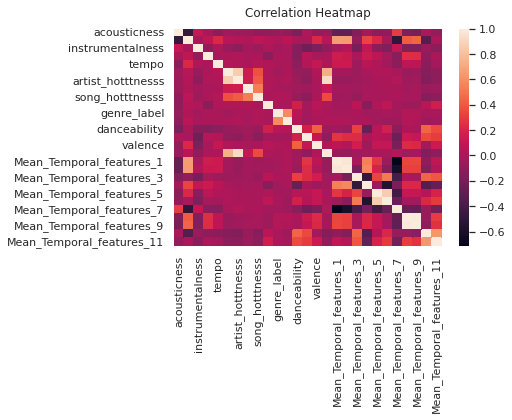

<Figure size 1440x720 with 0 Axes>

In [ ]:
#Correlation
df1.head()
heatmap = sns.heatmap(df1.corr())
plt.figure(figsize=(20,10))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')


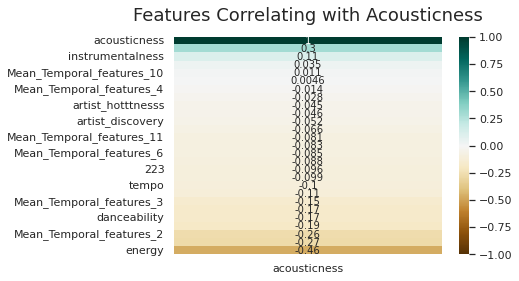

In [ ]:
#Features Correlation - Acousticness
heatmap = sns.heatmap(df1.corr()[['acousticness']].sort_values(by='acousticness', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Acousticness', fontdict={'fontsize':18}, pad=16);

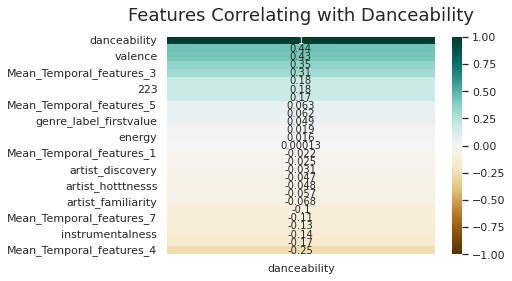

In [ ]:
#Features Correlation - Danceability
heatmap = sns.heatmap(df1.corr()[['danceability']].sort_values(by='danceability', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Danceability', fontdict={'fontsize':18}, pad=16);

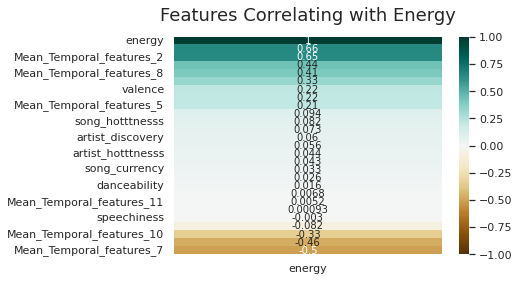

In [ ]:
#Features Correlation - Energy
heatmap = sns.heatmap(df1.corr()[['energy']].sort_values(by='energy', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Energy', fontdict={'fontsize':18}, pad=16);

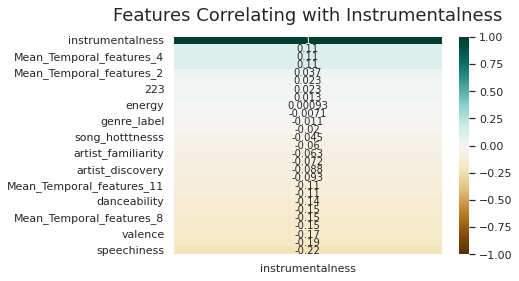

In [ ]:
#Features Correlation - Instrumentalness
heatmap = sns.heatmap(df1.corr()[['instrumentalness']].sort_values(by='instrumentalness', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Instrumentalness', fontdict={'fontsize':18}, pad=16);

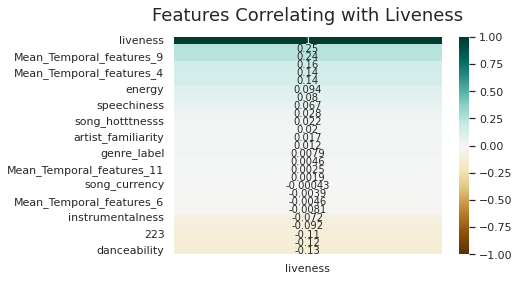

In [ ]:
#Features Correlation - Liveness
heatmap = sns.heatmap(df1.corr()[['liveness']].sort_values(by='liveness', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Liveness', fontdict={'fontsize':18}, pad=16);

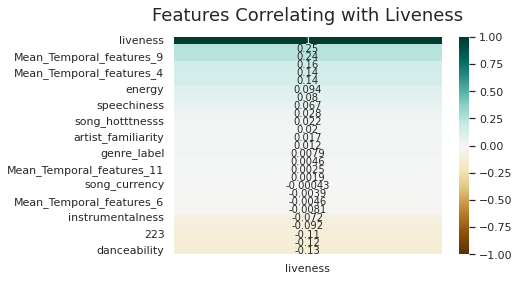

In [ ]:
#Features Correlation - Speechiness
heatmap = sns.heatmap(df1.corr()[['liveness']].sort_values(by='liveness', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Liveness', fontdict={'fontsize':18}, pad=16);

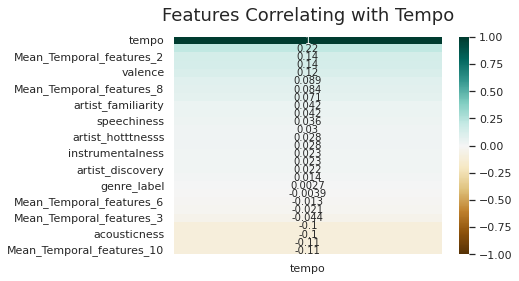

In [ ]:
#Features Correlation - Tempo
heatmap = sns.heatmap(df1.corr()[['tempo']].sort_values(by='tempo', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Tempo', fontdict={'fontsize':18}, pad=16);

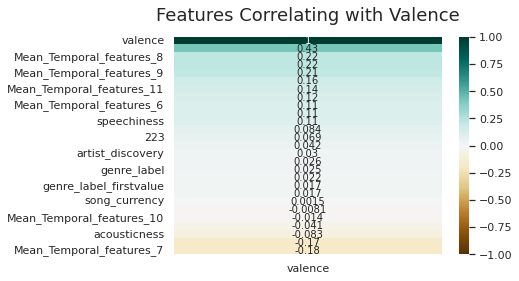

In [ ]:
#Features Correlation - Valence
heatmap = sns.heatmap(df1.corr()[['valence']].sort_values(by='valence', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Valence', fontdict={'fontsize':18}, pad=16);

In [ ]:
#Xs_train , Xs_test, ys_train, ys_test = train_test_split(Xs, ys , test_size = 0.20 )
#df1
df.shape

(11003, 32)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
Xs = df.loc[:, ~df.columns.isin(['track_id', 'release', 'genre_id',	'genre_top',	'genre_label', 'artist_name',	'release'	,'genre_label_firstvalue'])]

#value = Xs.columns
#print(value)

#for i in value:
#  error1 = df[i].isnull().sum()
#  print (error1)

Xs = Xs.to_numpy()
Ys = df[['genre_label_firstvalue']]
Ys = Ys.to_numpy()

Xs_train , Xs_test, ys_train, ys_test = train_test_split(Xs, Ys , test_size = 0.20 , random_state=1)

#print(Xs_train)
#Clf has criterion gini
clf = DecisionTreeClassifier(criterion = 'gini')
# clf 2 has entropy
clf2 = DecisionTreeClassifier(criterion = 'entropy')
model = clf.fit(Xs_train,ys_train)
model2 = clf2.fit(Xs_train,ys_train)

In [ ]:
#for gini model
ypred = model.predict(Xs_test)

print("For all features")
print("Accuracy",metrics.accuracy_score(ys_test, ypred))
print("Confusion Matrix \n",metrics.confusion_matrix(ys_test, ypred))


For all features
Accuracy 0.38573375738300775
Confusion Matrix 
 [[ 27   2   2   3   1  11  10   6   4   2   4   3   0   2   2   2   7   0
    0   0   0   0   0]
 [  0   8   3   1   1   3   4   3   6   2   1   1   0   0   0   2   2   1
    1   0   0   0   0]
 [  2   1  17   2   0   9   8  15   6   1   5   3   1   0   3   2   1   2
    3   1   0   0   0]
 [  0   0   4  47   1   2   0   2   6   0   0   0   0   0   1   1   1   0
    0   0   0   0   0]
 [  1   1   1   1  24   1   5   4   4   0   1   0   0   0   1   0   1   0
    0   0   0   1   0]
 [  5   1   7   2   0  68  43  38  18   2  11  12   2   5   2   2  13   1
    3   5   1   0   0]
 [ 10   6   8   4   1  33 163  27  28   1  14  18   3   9   6  16  13   3
    4   2   0   0   1]
 [ 12   5  18   3   3  40  39 205  13   7  48   8   5   4   4   6   9   3
   13   8   0   1   0]
 [  4   7   2   3   2  14  23  22  58   1   2   5   2   0   4   3   4   3
    0   1   0   0   0]
 [  1   0   1   1   1   4   6   7   6   7   1   2   1   0   0 

In [ ]:
from sklearn.feature_selection import RFE
#for gini model finding best group of features
acc =[]
for i in range(1,23):
  rfe = RFE(estimator = model , n_features_to_select = i , step = 1)
  rfe.fit(Xs_train, ys_train)
  pred = rfe.predict(Xs_test)
  #Accuracy list made to plot 
  print("Acc for ",i," is ",metrics.accuracy_score(ys_test, pred))
  acc.append(metrics.accuracy_score(ys_test, pred))
  #print("Confusion Matrix \n",metrics.confusion_matrix(ys_test, pred))


Acc for  1  is  0.8523398455247615
Acc for  2  is  0.8532485233984552
Acc for  3  is  0.8532485233984552
Acc for  4  is  0.7714675147660155
Acc for  5  is  0.6633348477964561
Acc for  6  is  0.6088141753748296
Acc for  7  is  0.43661971830985913
Acc for  8  is  0.3989095865515675
Acc for  9  is  0.4161744661517492
Acc for  10  is  0.4093593820990459
Acc for  11  is  0.3961835529304861
Acc for  12  is  0.3852794184461608
Acc for  13  is  0.39164016356201725
Acc for  14  is  0.3793730122671513
Acc for  15  is  0.3907314856883235
Acc for  16  is  0.3784643343934575
Acc for  17  is  0.3893684688777828
Acc for  18  is  0.3793730122671513
Acc for  19  is  0.3780099954566106
Acc for  20  is  0.3980009086778737
Acc for  21  is  0.36937755565651975
Acc for  22  is  0.3861880963198546


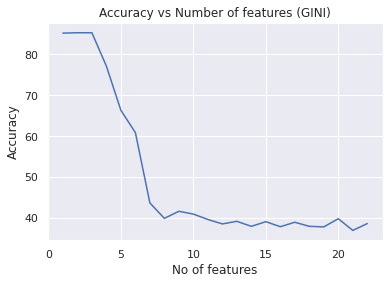

In [ ]:
import matplotlib.pyplot as plt
acc1=[]
for i in acc:
  acc1.append(i*100)
plt.plot( np.arange(1,23),acc1)
plt.title("Accuracy vs Number of features (GINI)")
plt.xlabel("No of features")
plt.ylabel("Accuracy") 

plt.show()

0.8532485233984552


Text(80.90000000000006, 0.5, 'predicted label')

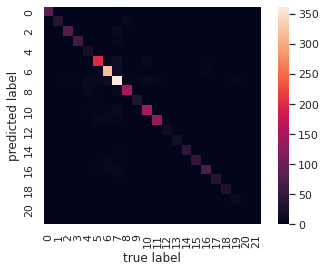

In [ ]:
#As accuracy is best for 2 features 
#Printing confusion matrix and final accuracy
from sklearn.metrics import confusion_matrix
rfe = RFE(estimator = model , n_features_to_select = 2 , step = 1)
rfe.fit(Xs_train, ys_train)
pred = rfe.predict(Xs_test)
#Accuracy list made to plot 
print(metrics.accuracy_score(ys_test, pred))
#print("Confusion Matrix \n",metrics.confusion_matrix(ys_test, pred))
mat = confusion_matrix(ys_test, pred)
sns.heatmap(mat.T, square=True, cbar=True,
            )
plt.xlabel('true label')
plt.ylabel('predicted label')


For all features
Accuracy 0.35938209904588825


Text(80.90000000000006, 0.5, 'predicted label')

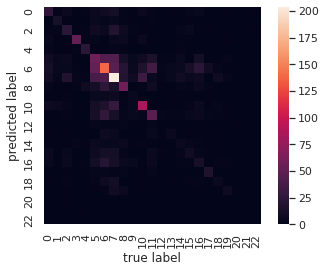

In [ ]:
#Checking entropy model
model2 = clf2.fit(Xs_train,ys_train)
ypred1 = model2.predict(Xs_test)
print("For all features")
print("Accuracy",metrics.accuracy_score(ys_test, ypred1))
#print("Confusion Matrix \n",metrics.confusion_matrix(ys_test, ypred1))
mat = confusion_matrix(ys_test, ypred1)
sns.heatmap(mat.T, square=True, cbar=True,
            )
plt.xlabel('true label')
plt.ylabel('predicted label')

Acc for  1  is  0.8523398455247615
Acc for  2  is  0.8577919127669241
Acc for  3  is  0.8573375738300772
Acc for  4  is  0.7510222626079055
Acc for  5  is  0.6042707860063607
Acc for  6  is  0.526124488868696
Acc for  7  is  0.4865970013630168
Acc for  8  is  0.4225352112676056
Acc for  9  is  0.417083144025443
Acc for  10  is  0.40981372103589275
Acc for  11  is  0.3948205361199455
Acc for  12  is  0.3902771467514766
Acc for  13  is  0.40708768741481144
Acc for  14  is  0.4052703316674239
Acc for  15  is  0.3907314856883235
Acc for  16  is  0.38573375738300775
Acc for  17  is  0.3948205361199455
Acc for  18  is  0.3771013175829169
Acc for  19  is  0.37482962289868244
Acc for  20  is  0.3743752839618355
Acc for  21  is  0.36210813266696956
Acc for  22  is  0.372557928214448


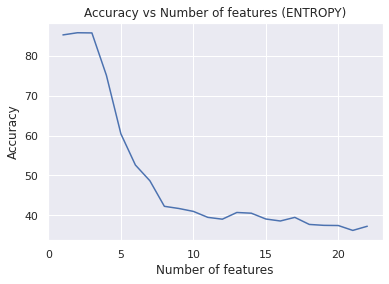

In [ ]:

#for entropy model finding best group of features
acc2 =[]
for i in range(1,23):
  rfe = RFE(estimator = model2 , n_features_to_select = i , step = 1)
  rfe.fit(Xs_train, ys_train)
  pred1 = rfe.predict(Xs_test)
  print("Acc for ",i," is ",metrics.accuracy_score(ys_test, pred1))
  #Accuracy list made to plot 
  acc2.append(metrics.accuracy_score(ys_test, pred1))
  #print("Confusion Matrix \n",metrics.confusion_matrix(ys_test, pred))

acc2_100=[]
for i in acc2:
  acc2_100.append(i*100)
plt.plot( np.arange(1,23),acc2_100)
plt.title("Accuracy vs Number of features (ENTROPY)")
plt.xlabel("Number of features")
plt.ylabel("Accuracy") 

plt.show()


In [ ]:
acc2_100=[]
for i in acc2:
  acc2_100.append(i*100)
plt.plot( np.arange(1,23),acc2)
plt.title("Accuracy vs Number of features (ENTROPY)")
plt.xlabel("Number of features")
plt.ylabel("Accuracy") 

plt.show()

In [ ]:
#As accuracy is best for 2 features 
model2 = clf2.fit(Xs_train,ys_train)
#Printing confusion matrix and final accuracy
rfe = RFE(estimator = model2 , n_features_to_select = 2 , step = 1)
rfe.fit(Xs_train, ys_train)
print(rfe.ranking_)
pred = rfe.predict(Xs_test)
#Accuracy list made to plot 
print("Highest accuracy ",metrics.accuracy_score(ys_test, pred))
#print("Confusion Matrix \n",metrics.confusion_matrix(ys_test, pred))
mat = confusion_matrix(ys_test, pred)
sns.heatmap(mat.T, square=True, cbar=True,
            )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
print("F1 score ", metrics.f1_score(ys_test, pred ,average='micro'))

In [ ]:
plt.plot(np.arange(0,10),acc1[:10], label = "gini")
plt.plot(np.arange(0,10),acc2_100[:10], label = "entropy")
plt.legend()
plt.title("Gini and Entropy")
plt.xlabel("Number of features")
plt.ylabel("Accuracy") 

plt.show()


In [ ]:
name = ['track_id', 'acousticness', 'energy', 'instrumentalness', 'liveness',
       'tempo', 'artist_name', 'release', 'artist_familiarity',
       'artist_hotttnesss', 'song_currency', 'song_hotttnesss', '223',
       'genre_id', 'genre_top', 'genre_label', 'danceability', 'speechiness',
       'valence', 'artist_discovery', 'Mean_Temporal_features_1',
       'Mean_Temporal_features_2', 'Mean_Temporal_features_3',
       'Mean_Temporal_features_4', 'Mean_Temporal_features_5']
print(name)
cname = df["genre_label"].unique().astype(str)
print(cname)

In [ ]:
#conda install graphviz-python
#conda install pydot

from sklearn.tree import export_graphviz
import graphviz
from graphviz import Source
from IPython.display import display

dot_data = export_graphviz(clf, out_file=None, filled =True)



graph = Source( export_graphviz(clf, out_file=None, feature_names=name, class_names = cname , rounded =True, filled =True))
graph.format = 'png'
graph.render('dtree_render',view=True)
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)
gtree = graphviz.Source(dot_data)

display(gtree)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
Gaussian_model=GaussianNB()
Gaussian_model.fit(Xs_train,ys_train)
ypred = Gaussian_model.predict(Xs_test)
print("Accuracy",metrics.accuracy_score(ys_test, ypred))
#print("Confusion Matrix \n",metrics.confusion_matrix(ys_test, ypred))
mat = confusion_matrix(ys_test, ypred)
sns.heatmap(mat.T, square=True, cbar=True,
            )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(Gaussian_model, Xs_test, ys_test)
print(imps.importances_mean*100)


In [ ]:
Gaussian_model=GaussianNB()
Gaussian_model.fit(Xs_train[:,(0,1,2,10,23)],ys_train)
ypred = Gaussian_model.predict(Xs_test[:,(0,1,2,10,23)])
print("Accuracy",metrics.accuracy_score(ys_test, ypred))
#print("Confusion Matrix \n",metrics.confusion_matrix(ys_test, ypred))
mat = confusion_matrix(ys_test, ypred)
sns.heatmap(mat.T, square=True, cbar=True,
            )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
import matplotlib.pyplot as plt
names =['Logistic Regression','Naive Bayes','Random Forest','Decision Tree (Gini)']
results =[28,32.7, 53.02, 86.91]

New_Colors = ['blue','purple','brown','teal']
plt.bar(names, results, color=New_Colors)
plt.title('Performance Comparison', fontsize=14)
plt.xlabel('Models', fontsize=10)
plt.xticks(rotation = 45)
plt.ylabel('Accuracy Score', fontsize=14)
plt.grid(True)
plt.ylim([0, 100])
plt.show()

In [ ]:
acc2_100

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
 
knn.fit(Xs_train, ys_train)
 
# Predict on dataset which model has not seen before
y_pred = knn.predict(Xs_test)
print(knn.score(Xs_test, ys_test))
print(y_pred)
print("For KNN Classification:\n\n")
print(metrics.classification_report(ys_test, y_pred))


In [ ]:
acc_knn_list=[]
for i in range(1,100):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(Xs_train, ys_train)
  # Predict on dataset which model has not seen before
  y_pred = knn.predict(Xs_test)
  acc_knn =metrics.accuracy_score(ys_test, y_pred)
  acc_knn_list.append(acc_knn)


In [ ]:
plt.plot(np.arange(0,99),acc_knn_list)
plt.title("Knn accuracy")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy") 

plt.show()

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=20)
model_clf= knn_clf.fit(Xs_train, ys_train)
acc_rfe =[]
for i in range(1,23):
  rfe = RFE(estimator = model_clf  , n_features_to_select = i , step = 1)
  rfe.fit(Xs_train, ys_train)
  pred1 = rfe.predict(Xs_test)
  print("Acc for ",i," is ",metrics.accuracy_score(ys_test, pred1))
  #Accuracy list made to plot 
  acc_rfe.append(metrics.accuracy_score(ys_test, pred1))
  #print("Confusion Matrix \n",metrics.confusion_matrix(ys_test, pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


ValueError: ignored